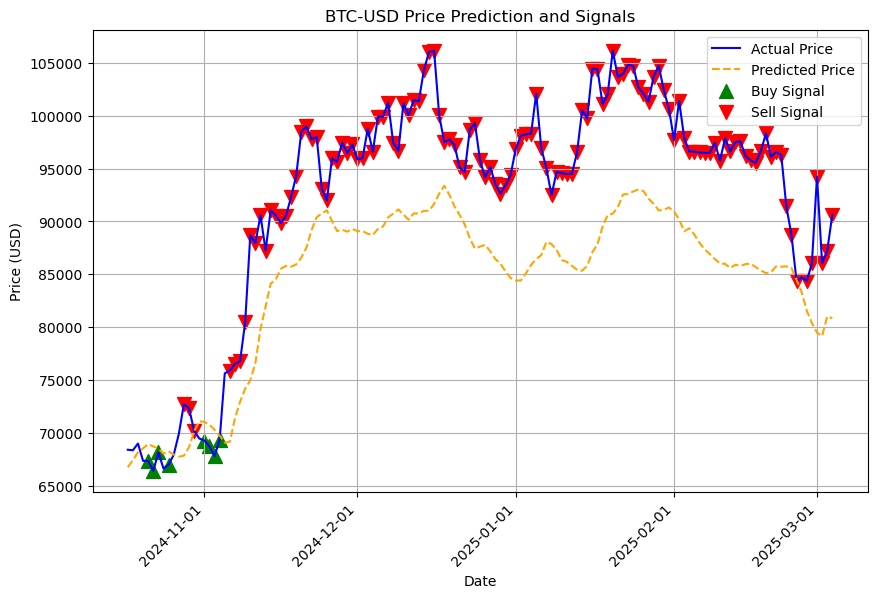

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk
import matplotlib.dates as mdates
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to load and plot data for a given ticker
def plot_signals(ticker, ax):
    # Load signals data
    df = pd.read_csv(f"{ticker}_signals.csv", index_col="Date", parse_dates=True)
    
    # Clear the axis
    ax.clear()
    
    # Plot actual and predicted prices
    ax.plot(df.index, df["Actual"], label="Actual Price", color="blue")
    ax.plot(df.index, df["Predicted"], label="Predicted Price", color="orange", linestyle="--")
    
    # Plot buy signals
    buy_signals = df[df["Signal"] == 1]
    ax.scatter(buy_signals.index, buy_signals["Actual"], marker="^", color="green", label="Buy Signal", s=100)
    
    # Plot sell signals
    sell_signals = df[df["Signal"] == -1]
    ax.scatter(sell_signals.index, sell_signals["Actual"], marker="v", color="red", label="Sell Signal", s=100)
    
    # Formatting
    ax.set_title(f"{ticker} Price Prediction and Signals")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price (USD)")
    ax.legend()
    ax.grid(True)
    
    # Rotate date labels for better readability
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# GUI class
class CryptoGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Crypto Price Prediction Dashboard")
        
        # Dropdown menu for ticker selection
        self.ticker_label = tk.Label(root, text="Select Cryptocurrency:")
        self.ticker_label.pack(pady=5)
        
        self.tickers = ["BNB-USD", "BTC-USD", "ETH-USD", "XRP-USD"]
        self.ticker_var = tk.StringVar(value=self.tickers[0])
        self.ticker_menu = ttk.Combobox(root, textvariable=self.ticker_var, values=self.tickers, state="readonly")
        self.ticker_menu.pack(pady=5)
        
        # Create matplotlib figure
        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack(pady=10)
        
        # Plot initial ticker
        plot_signals(self.ticker_var.get(), self.ax)
        self.canvas.draw()
        
        # Update plot when ticker changes
        self.ticker_menu.bind("<<ComboboxSelected>>", self.update_plot)
    
    def update_plot(self, event=None):
        ticker = self.ticker_var.get()
        plot_signals(ticker, self.ax)
        self.canvas.draw()

# Run the GUI
if __name__ == "__main__":
    root = tk.Tk()
    app = CryptoGUI(root)
    root.mainloop()